# Analysis of Direct AM vs Latent AM Simulations

This notebook compares the PGS1 correlations between Direct Assortative Mating (DirectAM) and Latent Assortative Mating (LatentAM) conditions across different relationship types.

In [1]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Load summary statistics from both conditions
direct_am_path = "../../Data/DirectAM/summary_statistics.csv"
latent_am_path = "../../Data/LatentAM/summary_statistics.csv"

# Read the CSV files
direct_am = pd.read_csv(direct_am_path, header=[0, 1], index_col=[0, 1])
latent_am = pd.read_csv(latent_am_path, header=[0, 1], index_col=[0, 1])

# Filter for PGS1 only and extract mean correlations
direct_pgs1 = direct_am.xs('PGS1', level='Variable')[('Correlation', 'mean')]
latent_pgs1 = latent_am.xs('PGS1', level='Variable')[('Correlation', 'mean')]

print("Direct AM - PGS1 correlations loaded")
print("Latent AM - PGS1 correlations loaded")
print(f"Number of relationship types: {len(direct_pgs1)}")

Direct AM - PGS1 correlations loaded
Latent AM - PGS1 correlations loaded
Number of relationship types: 16


In [3]:
# Create comparison dataframe
comparison_df = pd.DataFrame({
    'Direct AM': direct_pgs1,
    'Latent AM': latent_pgs1
})

# Sort by Direct AM values for better visualization
comparison_df = comparison_df.sort_values('Direct AM', ascending=False)

print("Comparison DataFrame:")
print(comparison_df)

Comparison DataFrame:
                  Direct AM  Latent AM
RelationshipPath                      
S                    0.5586     0.5010
PSC                  0.1999     0.1189
M                    0.1401    -0.0151
MS                   0.1052    -0.0028
SMS                  0.0844    -0.0034
PPSCC                0.0822     0.0264
MSC                  0.0737     0.0104
SMSC                 0.0581     0.0073
MSM                  0.0408     0.0087
PSMSC                0.0373     0.0118
SMSM                 0.0368     0.0038
SMSMS                0.0299     0.0041
MSMSC                0.0224     0.0036
SMSMSC               0.0185     0.0018
MSMSMS               0.0160    -0.0008
MSMSM                0.0117     0.0014


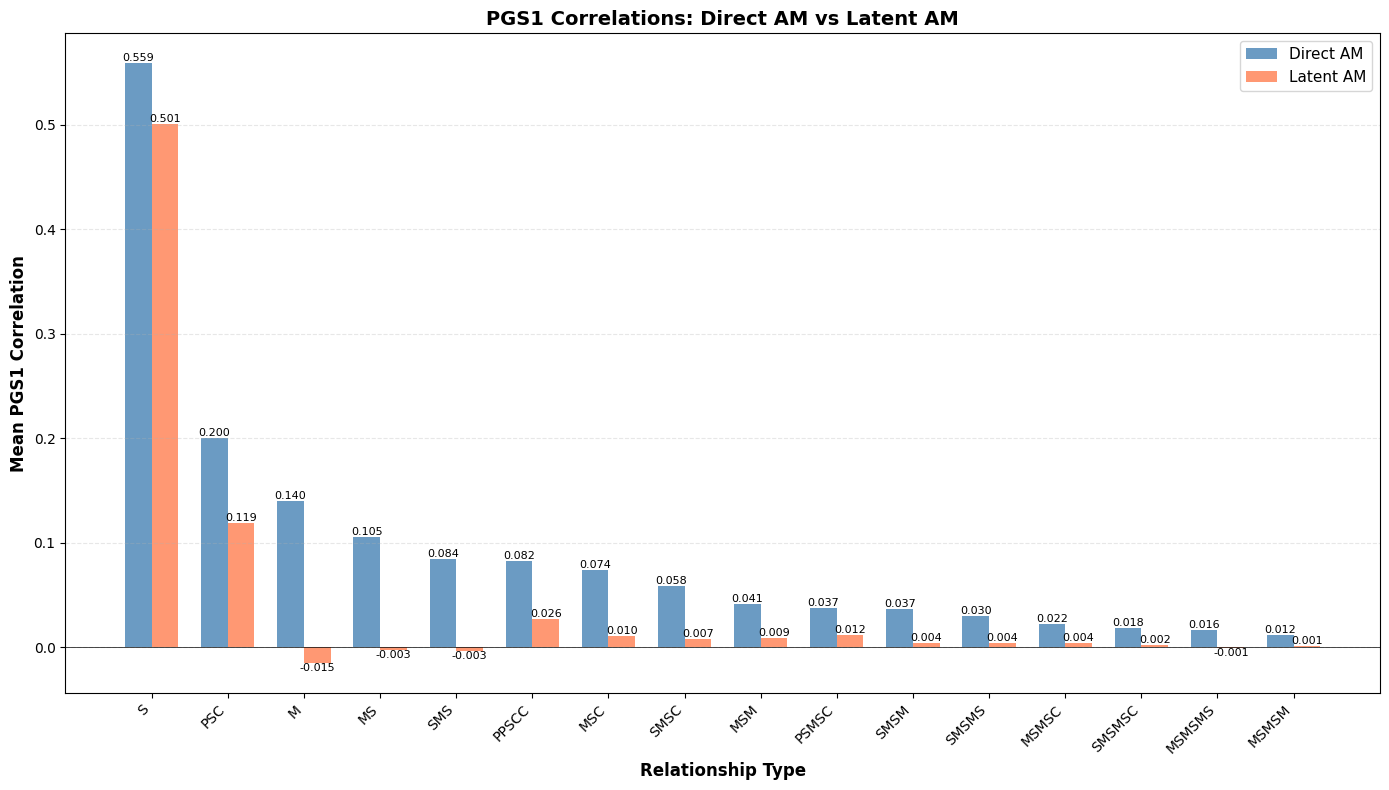


Plot created successfully!


In [4]:
# Create bar plot comparing PGS1 correlations
fig, ax = plt.subplots(figsize=(14, 8))

# Set up bar positions
x = np.arange(len(comparison_df))
width = 0.35

# Create bars
bars1 = ax.bar(x - width/2, comparison_df['Direct AM'], width, 
               label='Direct AM', alpha=0.8, color='steelblue')
bars2 = ax.bar(x + width/2, comparison_df['Latent AM'], width, 
               label='Latent AM', alpha=0.8, color='coral')

# Customize plot
ax.set_xlabel('Relationship Type', fontsize=12, fontweight='bold')
ax.set_ylabel('Mean PGS1 Correlation', fontsize=12, fontweight='bold')
ax.set_title('PGS1 Correlations: Direct AM vs Latent AM', fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(comparison_df.index, rotation=45, ha='right')
ax.legend(fontsize=11)
ax.grid(axis='y', alpha=0.3, linestyle='--')
ax.axhline(y=0, color='black', linestyle='-', linewidth=0.5)

# Add value labels on bars
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.3f}',
                ha='center', va='bottom' if height > 0 else 'top', 
                fontsize=8, rotation=0)

plt.tight_layout()
plt.show()

print("\nPlot created successfully!")